In [1]:
include("infogan_CelebA.jl")

InfoGAN_CelebA

In [2]:
using JLD2, Knet, Plots
plotlyjs();     # for interactive plots

In [3]:
atype = KnetArray{Float32}; zdim=128; cdim=10; ndisc=10;

In [4]:
wd, wg, wq, md, mg, mq = InfoGAN_CelebA.load_weights(atype, zdim, cdim, ndisc, "../CelebA/CelebA_MM/models/0021.jld2"); 

In [5]:
ncols = 10; nrows = 5;
l0_cons = map(i->reshape(collect(1:nrows), 1, nrows), 1:ncols)
l1_cons = vec(vcat(l0_cons...))
l0_var = map(i->reshape(collect(1:ncols), 1, ncols), 1:nrows)
l1_var = vec(hcat(l0_var...));


In [6]:
gridscale = 2.0
disc_embed_mat = InfoGAN_CelebA.init_disc_embed(atype, cdim)

# Fix some noise and code to check the GAN output
z_fix = InfoGAN_CelebA.sample_unif(atype,zdim,nrows*ncols)
# Discrete codes for example generations
cl_var = convert(atype, disc_embed_mat[:,l1_var])
cl_cons = convert(atype, disc_embed_mat[:,l1_cons])

Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x00000081056e3000, 2000, 0, nothing), (10, 50))

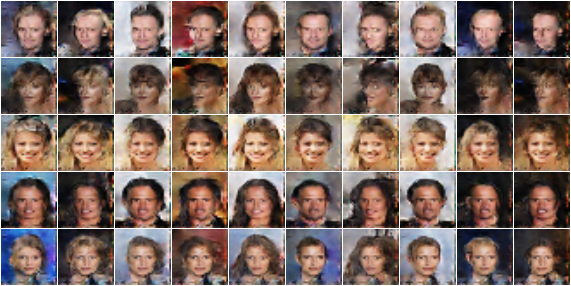

In [7]:
#haircut and style
c_fix = vcat(cl_cons, cl_var, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(nrows, ncols))

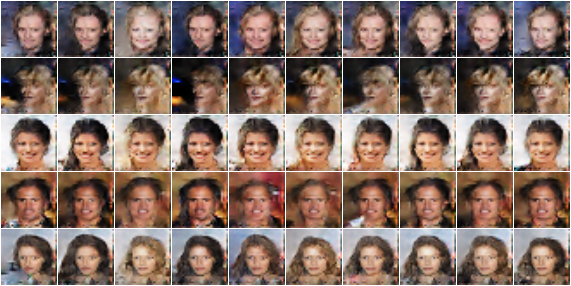

In [8]:
#hair color
c_fix = vcat(cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons, cl_var)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(nrows, ncols))

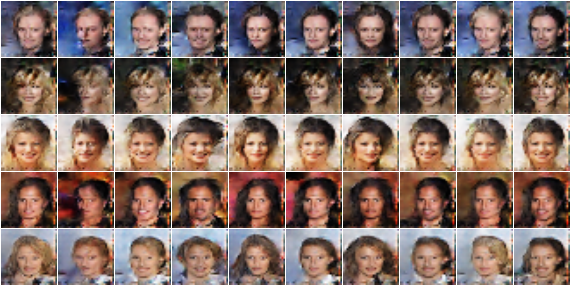

In [9]:
#smile
c_fix = vcat(cl_cons, cl_cons, cl_cons, cl_cons, cl_var, cl_cons, cl_cons, cl_cons, cl_cons, cl_cons)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(nrows, ncols))